# Data Information and Preparation for COM-480

Contributors:
- Burcu Özer
- Elif Kurtay
- Nikhen S. Nyo

All datasets are taken from Kaggle:
- [Coffee Quality Data (CQI May-2023)](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi) used to do the color analysis of coffee (pie chart)
- [Cocktail Ingredients](https://www.kaggle.com/datasets/ai-first/cocktail-ingredients) used to display preparation and measures of cocktails with coffee
- [Coffee ratings and Coffee description dataset](https://www.kaggle.com/datasets/hanifalirsyad/coffee-scrap-coffeereview) is used to visualize coffee varieties, their ratings, and which country/city came from in a world map
- [Coffee Coding and Data](https://www.kaggle.com/datasets/shrutikunapuli/coffee-and-code-dataset/data) is used to showcase some coder's personality types according to their coffee consumption
- [Coffee Tastes & Survey data](https://www.kaggle.com/datasets/sujaykapadnis/lets-do-some-coffee-tasting) is used to showcase reasons why people drink coffee and their preferences in taste


Abondened:
- [Coffee Reviews Dataset](https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset)

## Setup and Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# point to your Data Visualization Folder
%cd /content/drive/MyDrive/Colab\ Notebooks/Data\ Visualization/

/content/drive/.shortcut-targets-by-id/1_ha3UQpwjRkNRH1-sLLFjfwnrO_lAML_/Data Visualization


In [7]:
# load datasets
cocktails_df = pd.read_csv("datasets/cocktails.csv", index_col=0)
quality_df = pd.read_csv("datasets/quality_for_color.csv", index_col=0).set_index(['ID'])
reviews_df = pd.read_csv("datasets/coffee_reviews/coffee_clean.csv", index_col=0)
survey_df = pd.read_csv("datasets/coffee_survey.csv", index_col=0)
coders_df = pd.read_csv("datasets/coders.csv")

In [8]:
cocktails_df.shape, quality_df.shape, reviews_df.shape, survey_df.shape, coders_df.shape

((546, 40), (207, 39), (2440, 19), (4042, 112), (100, 9))

## Cocktails Dataset

In [ ]:
cocktails_df.head()

,strDrink,dateModified,idDrink,strAlcoholic,strCategory,strDrinkThumb,strGlass,strIBA,strIngredient1,strIngredient10,...,strMeasure15,strMeasure2,strMeasure3,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strVideo
0,'57 Chevy with a White License Plate,2016-07-18 22:49:04,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,Creme de Cacao,NaN,...,NaN,1 oz,,,,,,NaN,NaN,NaN
1,1-900-FUK-MEUP,2016-07-18 22:27:04,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,Absolut Kurant,NaN,...,NaN,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/2 oz,1/4 oz,,NaN
2,110 in the shade,2016-02-03 14:51:57,15423,Alcoholic,Beer,http://www.thecocktaildb.com/images/media/drin...,Beer Glass,NaN,Lager,NaN,...,NaN,1.5 oz,,,,,,NaN,NaN,NaN
3,151 Florida Bushwacker,2016-07-18 22:28:43,14588,Alcoholic,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,Beer mug,NaN,Malibu rum,NaN,...,NaN,1/2 oz,1/2 oz Bacardi,1 oz,1 oz,3 oz,1 oz,1 cup,,NaN
4,155 Belmont,2016-10-05 12:36:28,15346,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,White wine glass,NaN,Dark rum,NaN,...,NaN,2 shots,1 shot,1 shot,,,,,,NaN


In [ ]:
ingredient_cols = list(filter(("").__ne__, [x if "strIngredient" in x else "" for x in cocktails_df.columns]))
measure_cols = list(filter(("").__ne__, [x if "strMeasure" in x else "" for x in cocktails_df.columns]))

# Define a custom function to combine ingredient and measurements columns
def combine_columns(row, ingredient=True):
  merged_list = []
  cols = ingredient_cols if ingredient else measure_cols
  for col in cols:
    if row[col]:
      merged_list.append(row[col])
  return merged_list

cocktails_df['ingredients'] = cocktails_df.apply(combine_columns, axis=1)
cocktails_df['measures'] = cocktails_df.apply(lambda row: combine_columns(row, ingredient=False), axis=1)

In [ ]:
# how many cocktail recipes include coffee
cocktails_df['has_coffee'] = cocktails_df.apply(lambda row: "Coffee" in row['ingredients'], axis=1)
cocktails_df["has_coffee"].value_counts()

False    520
True      26
Name: has_coffee, dtype: int64

In [ ]:
# extract recipes with only coffee and clean the dataset
coffee_cocktails = cocktails_df[cocktails_df["has_coffee"] == True]
coffee_cocktails = coffee_cocktails[['strDrink', 'strAlcoholic', 'strCategory', 'strGlass', 'ingredients', 'measures', 'strInstructions', 'strDrinkThumb']]
coffee_cocktails = coffee_cocktails.rename(columns={"strDrink": "drink_name", "strAlcoholic": "is_alcoholic", "strCategory": "category", "strGlass": "glass_type", "strDrinkThumb": "image", "strInstructions": "instructions"}).reset_index(drop=True)

In [ ]:
coffee_cocktails

,drink_name,is_alcoholic,category,glass_type,ingredients,measures,instructions,image
0,Afternoon,Alcoholic,Coffee / Tea,Collins Glass,"[Kahlua, nan, nan, nan, nan, nan, nan, Bailey'...","[1 cl , \n, nan, nan, nan, nan, nan, 1 cl , 1 ...","Build into a suiting glass, with no ice. Cream...",http://www.thecocktaildb.com/images/media/drin...
1,Almond Chocolate Coffee,Alcoholic,Ordinary Drink,Coffee mug,"[Amaretto, nan, nan, nan, nan, nan, nan, Dark ...","[3/4 oz , nan, nan, nan, nan, nan, nan, 1/2 oz...",Pour in order into coffee cup. Top with whippe...,http://www.thecocktaildb.com/images/media/drin...
2,Cafe Savoy,Alcoholic,Coffee / Tea,Coffee mug,"[Coffee, nan, nan, nan, nan, nan, nan, Milk, T...","[\n, nan, nan, nan, nan, nan, nan, 1/2 oz , 1/...","Fill mug almost to top with coffee.Add milk, t...",http://www.thecocktaildb.com/images/media/drin...
3,Coffee Liqueur,Alcoholic,Homemade Liqueur,Collins Glass,"[Coffee, nan, nan, nan, nan, nan, nan, Vanilla...","[10 tblsp instant , , nan, nan, nan, nan, nan...","Combine coffee, sugar and water. Simmer 1 hour...",http://www.thecocktaildb.com/images/media/drin...
4,Coffee-Vodka,Alcoholic,Homemade Liqueur,Collins Glass,"[Water, nan, nan, nan, nan, nan, nan, Sugar, C...","[2 cups , \n, \n, nan, nan, nan, nan, 2 cups w...",Boil water and sugar until dissolved. Turn off...,http://www.thecocktaildb.com/images/media/drin...
5,Danbooka,Alcoholic,Coffee / Tea,Coffee Mug,"[Coffee, nan, nan, nan, nan, nan, nan, Evercle...","[3 parts , nan, nan, nan, nan, nan, nan, 1 par...",pour it in and mix it.,http://www.thecocktaildb.com/images/media/drin...
6,Frappé,Non alcoholic,Coffee / Tea,Highball Glass,"[Coffee, nan, nan, nan, nan, nan, nan, Milk, S...","[1/2 cup black , nan, nan, nan, nan, nan, nan,...",Mix together. Blend at highest blender speed f...,http://www.thecocktaildb.com/images/media/drin...
7,Fuzzy Asshole,Alcoholic,Coffee / Tea,Coffee mug,"[Coffee, nan, nan, nan, nan, nan, nan, Peach s...","[1/2 , nan, nan, nan, nan, nan, nan, 1/2 , , ...",fill coffe mug half full of coffee. Fill the o...,http://www.thecocktaildb.com/images/media/drin...
8,H.D.,Alcoholic,Coffee / Tea,Beer mug,"[Whisky, nan, nan, nan, nan, nan, nan, Bailey'...","[4 cl , nan, nan, nan, nan, nan, nan, 8 cl , \...",Mix the whisky and Baileys Cream in a beer-gla...,http://www.thecocktaildb.com/images/media/drin...
9,Homemade Kahlua,Alcoholic,Homemade Liqueur,Collins Glass,"[Sugar, nan, nan, nan, nan, nan, nan, Corn syr...","[2 1/2 cups , , , nan, nan, nan, nan, 1 cup ...",Dissolve sugar in 2 cups of boiling water and ...,http://www.thecocktaildb.com/images/media/drin...


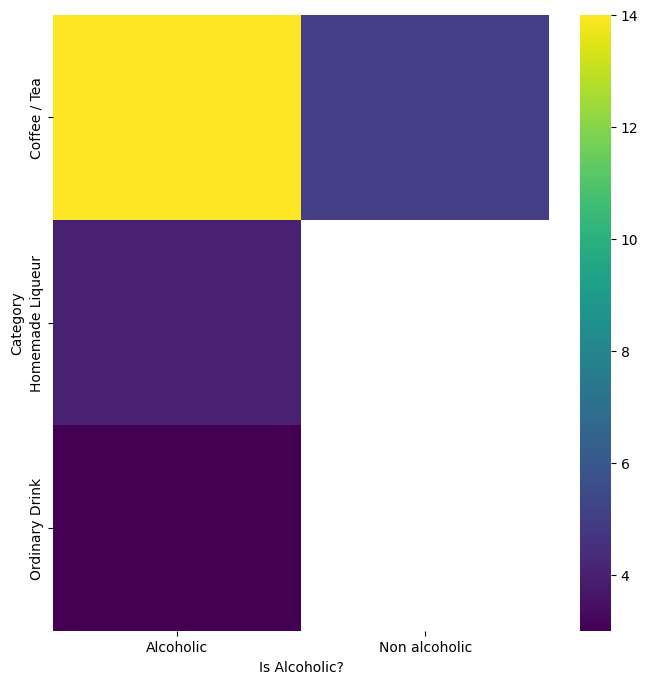

In [ ]:
# Visualise number of recipers per drink category and whether they are alcoholic
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in coffee_cocktails.groupby('is_alcoholic')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Is Alcoholic?')
_ = plt.ylabel('Category')

<Axes: >

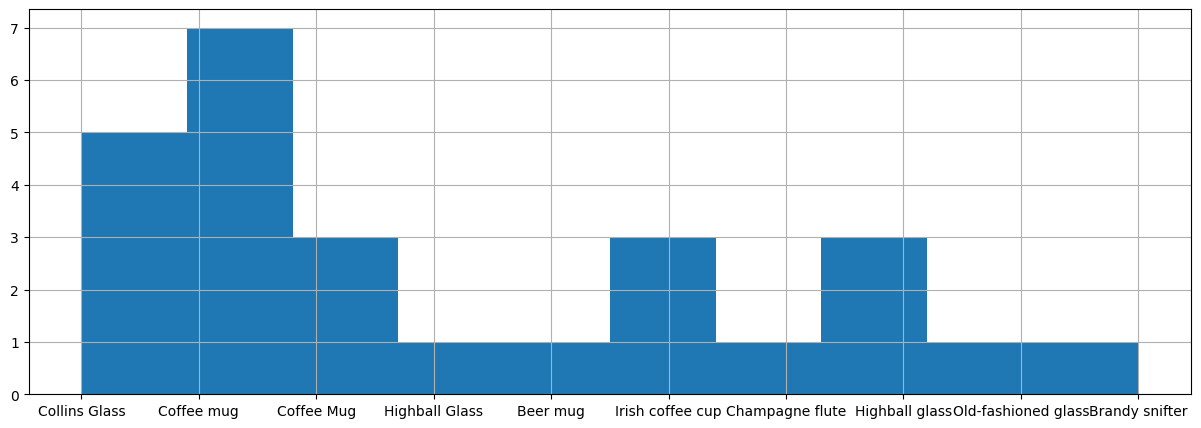

In [ ]:
coffee_cocktails["glass_type"].hist(figsize=(15,5))

## Quality Dataset


In [ ]:
quality_df.head()

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
ID,,,,,,,,,,,,,,,,,,,,,
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [ ]:
colors = quality_df["Color"]
colors.value_counts()

green            101
greenish          36
bluish-green      21
blue-green        12
yellow-green      10
brownish           9
pale yellow        6
yellow green       5
yellowish          4
yellow- green      1
browish-green      1
yello-green        1
Name: Color, dtype: int64

In [ ]:
colors.unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'yellow green',
       'greenish', 'brownish', 'yellow- green', 'browish-green',
       'bluish-green', 'pale yellow', 'yello-green'], dtype=object)

In [ ]:
color_map = {"green": "green", 'greenish': 'green', 'browish-green': 'brown-green', 'brownish': 'brown',
             'blue-green': 'blue-green', 'bluish-green': 'blue-green',
             'yellowish': 'pale yellow', 'pale yellow': 'pale yellow',
             'yellow-green': 'yellow-green', 'yellow green': 'yellow-green', 'yellow- green': 'yellow-green', 'yello-green': 'yellow-green',}

colors = colors.apply(lambda row: color_map[row])
colors.unique()

array(['green', 'blue-green', 'pale yellow', 'yellow-green', 'brown',
       'brown-green'], dtype=object)

In [ ]:
quality_df["clean_color"] = colors
quality_df[["Country of Origin","clean_color"]]

,Country of Origin,clean_color
ID,,
0,Colombia,green
1,Taiwan,blue-green
2,Laos,pale yellow
3,Costa Rica,green
4,Colombia,yellow-green
...,...,...
202,Brazil,green
203,Nicaragua,green
204,Laos,green


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('clean_color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

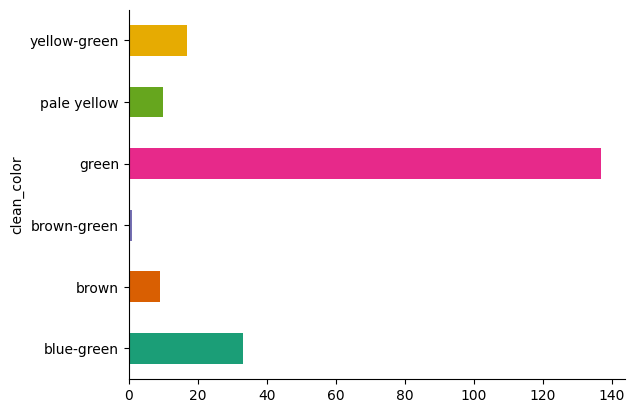

In [ ]:
_df_0.groupby('clean_color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Coders and Coffee Dataset

In [9]:
coders_df.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


### Basic Statistics and Information

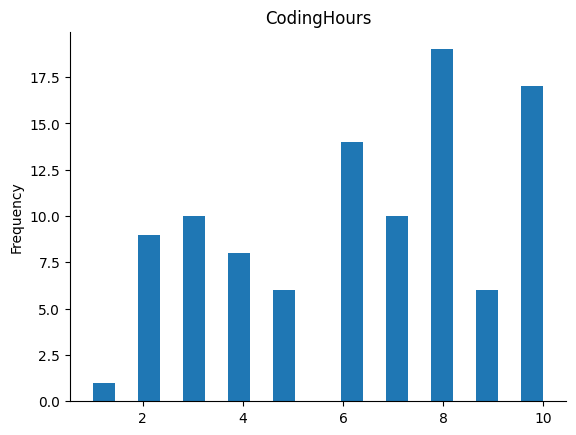

In [ ]:
# @title CodingHours

coders_df['CodingHours'].plot(kind='hist', bins=20, title='CodingHours')
plt.gca().spines[['top', 'right',]].set_visible(False)

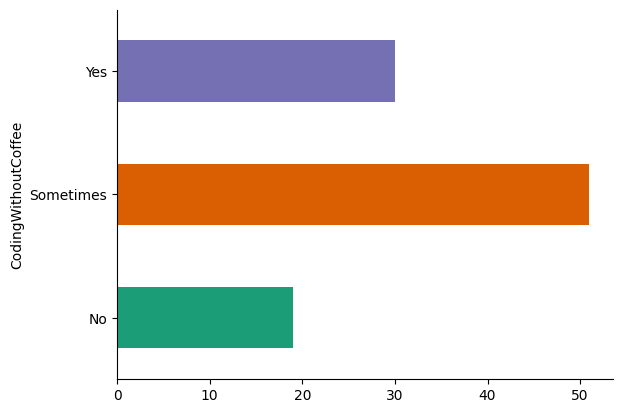

In [ ]:
# @title CodingWithoutCoffee
coders_df.groupby('CodingWithoutCoffee').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-52-d5dd2f3f17b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(coders_df, x='CoffeeCupsPerDay', y='CoffeeTime', inner='stick', palette='Dark2')


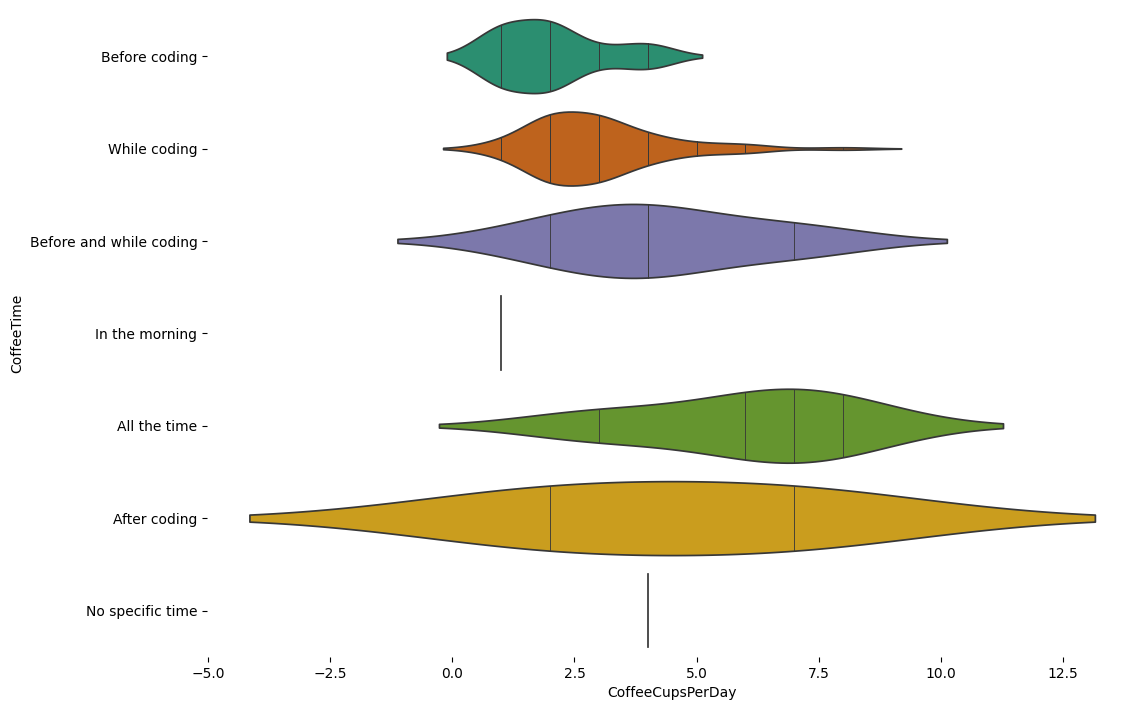

In [ ]:
# @title CoffeeTime vs CoffeeCupsPerDay

figsize = (12, 1.2 * len(coders_df['CoffeeTime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(coders_df, x='CoffeeCupsPerDay', y='CoffeeTime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

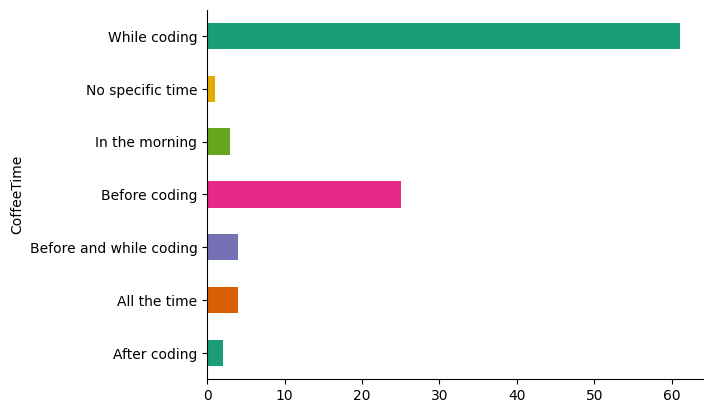

In [ ]:
# @title CoffeeTime

coders_df.groupby('CoffeeTime').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

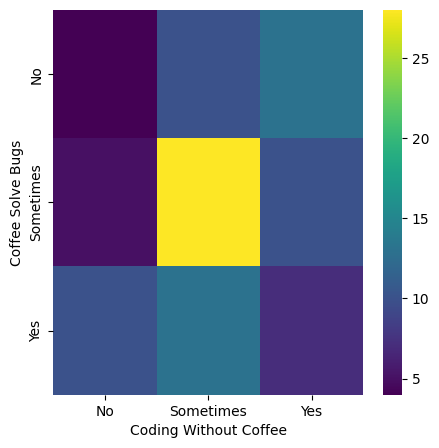

In [ ]:
# @title CodingWithoutCoffee vs CoffeeSolveBugs
plt.subplots(figsize=(5, 5))
df_2dhist = pd.DataFrame({
    x_label: grp['CoffeeSolveBugs'].value_counts()
    for x_label, grp in coders_df.groupby('CodingWithoutCoffee')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coding Without Coffee')
_ = plt.ylabel('Coffee Solve Bugs')

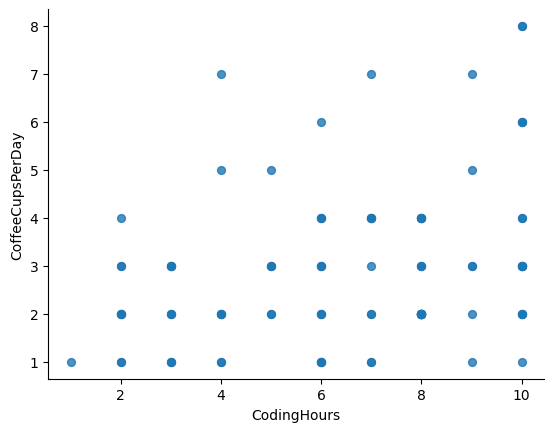

In [ ]:
# @title CodingHours vs CoffeeCupsPerDay

coders_df.plot(kind='scatter', x='CodingHours', y='CoffeeCupsPerDay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

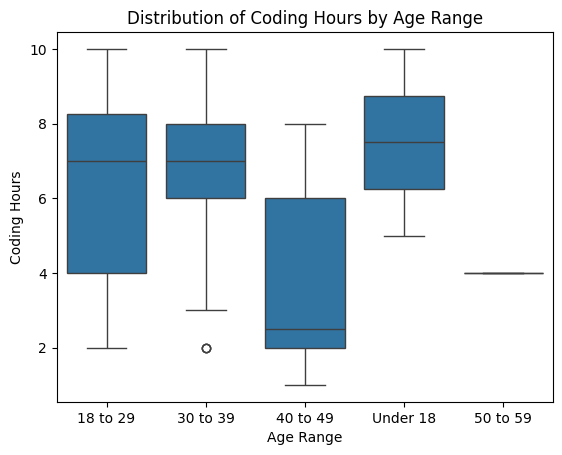

In [ ]:
sns.boxplot(data=coders_df, x="AgeRange", y="CodingHours")
plt.xlabel("Age Range")
plt.ylabel("Coding Hours")
plt.title("Distribution of Coding Hours by Age Range")
plt.show()

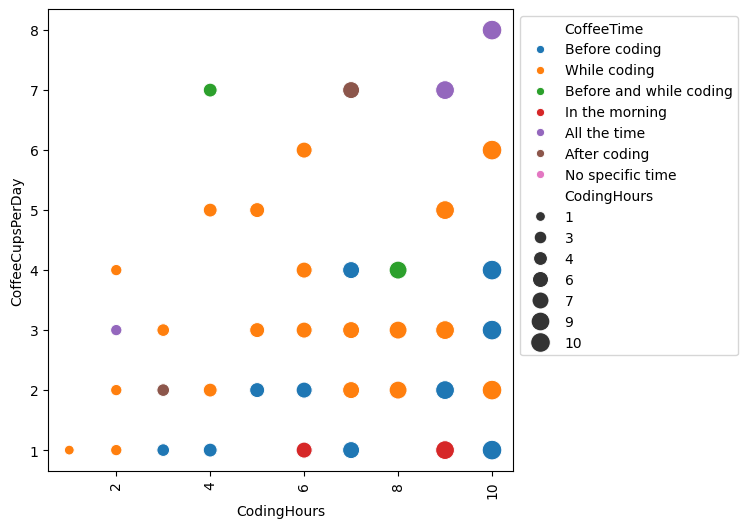

In [ ]:
plt.figure(figsize=(6, 6))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=coders_df['CodingHours'],y=coders_df['CoffeeCupsPerDay'],hue=coders_df['CoffeeTime'],size=coders_df['CodingHours'],data=coders_df,sizes=(50,200))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

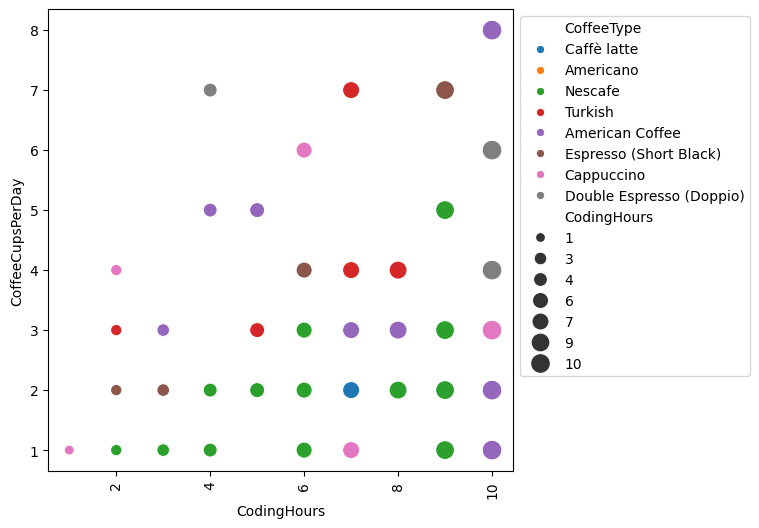

In [ ]:
plt.figure(figsize=(6, 6))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=coders_df['CodingHours'],y=coders_df['CoffeeCupsPerDay'],hue=coders_df['CoffeeType'],size=coders_df['CodingHours'],data=coders_df,sizes=(50,200))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

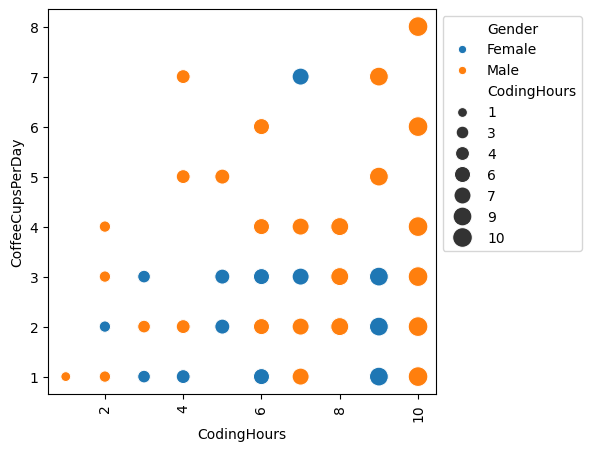

In [ ]:
plt.figure(figsize=(5, 5))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=coders_df['CodingHours'],y=coders_df['CoffeeCupsPerDay'],hue=coders_df['Gender'],size=coders_df['CodingHours'],data=coders_df,sizes=(50,200))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

### Advanced look into data

In [3]:
!pip install pycaret --ignore-installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 684.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 635.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 901.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 843.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 471.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 645.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 421.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7

In [24]:
from pycaret.clustering import *

In [11]:
exp_clus = setup(coders_df,session_id = 1)

,Description,Value
0,Session id,1
1,Original data shape,"(100, 9)"
2,Transformed data shape,"(100, 30)"
3,Numeric features,2
4,Categorical features,7
5,Rows with missing values,3.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [12]:
kmeans = create_model('kmeans',num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2269,41.4077,1.2704,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

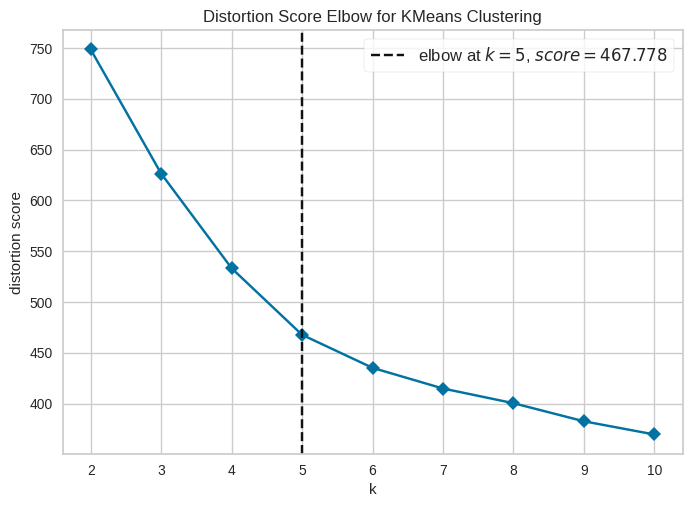

In [13]:
plot_model(kmeans, 'elbow')

In [14]:
kmeans_df = assign_model(kmeans)

In [15]:
kmeans_df.groupby('Cluster').mean().T

Cluster,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
CodingHours,9.375,5.666667,8.702703,5.842105,2.708333
CoffeeCupsPerDay,6.625,1.333333,2.594595,3.894737,2.083333


In [16]:
kmeans_df.groupby('Cluster').count().T

Cluster,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
CodingHours,8,12,37,19,24
CoffeeCupsPerDay,8,12,37,19,24
CoffeeTime,8,12,37,19,24
CodingWithoutCoffee,8,12,37,19,24
CoffeeType,7,12,37,19,24
CoffeeSolveBugs,8,12,37,19,24
Gender,8,12,37,19,24
Country,8,12,37,19,24
AgeRange,8,11,36,19,24


In [17]:
kmeans_df.groupby('Cluster').describe().T

Cluster                 Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
CodingHours      count    8.00000  12.000000  37.000000  19.000000  24.000000
                 mean     9.37500   5.666667   8.702703   5.842105   2.708333
                 std      1.06066   0.984732   0.996239   0.958190   0.806450
                 min      7.00000   4.000000   7.000000   4.000000   1.000000
                 25%      9.00000   5.000000   8.000000   5.000000   2.000000
                 50%     10.00000   6.000000   8.000000   6.000000   3.000000
                 75%     10.00000   6.000000  10.000000   6.500000   3.000000
                 max     10.00000   7.000000  10.000000   7.000000   4.000000
CoffeeCupsPerDay count    8.00000  12.000000  37.000000  19.000000  24.000000
                 mean     6.62500   1.333333   2.594595   3.894737   2.083333
                 std      1.06066   0.492366   0.864724   1.196975   0.829702
                 min      5.00000   1.000000   1.000000   2.000000   1.000000
                 25%      6.00000   1.000000   2.000000   3.000000   1.750000
                 50%      6.50000   1.000000   2.000000   4.000000   2.000000
                 75%      7.25000   2.000000   3.000000   4.000000   3.000000
                 max      8.00000   2.000000   4.000000   7.000000   4.000000

In [21]:
plot_model(kmeans, plot='cluster',scale=1)

**Cluster0:** 33% are in Cluster0. They are most common coffee drinkers in coding. They drink coffee while they are coding and before coding. They are 18 to 29 years old.

**Cluster1:** 20% are in Cluster1. They do not drink coffee so much,less than 3 cups per day, most of them drink only one cup per day. Most of them like Nescafe. Most of them are 18 to 29 years old or 30 to 39 years old.

**Cluster2:** 17% are in Cluster2. They are mainly occupied by female. They do not drink coffee so much, less than 3 cups per day, most of them drink two cups per day. Most of them like American coffee or Nescafe. Most of them are 18 to 29 years old.

**Cluster3:** 11% are in Cluster3. They are coding for long hours and drink coffee too much, most of them drink more than 4 cups per day. And they drink coffee not only while they are coding but also all the time. Most of them are 18 to 29 years old.

**Cluster4:** 19% are in Cluster4. They are over 40 years old. Most of them drink coffee while they are coding, 2 to 4 cups per day. About half of them like Turkish coffee.

In [22]:
plot_model(kmeans, plot = 'distribution', feature = 'CoffeeCupsPerDay')

In [23]:
plot_model(kmeans, plot = 'distribution', feature = 'Gender')


## Coffee Ratings and Description Dataset

In [25]:
reviews_df.head()

,all_text,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
slug,,,,,,,,,,,,,,,,,,,
https://www.coffeereview.com/review/kenya-nyeri-gichathaini-aa-top/,\n\n\n93\n\n\nLu's Coffee\nKenya Nyeri Gichat...,93,Lu's Coffee,Kenya Nyeri Gichathaini AA Top,"New Taipei City, Taiwan","Nyeri growing region, south-central Kenya",Medium-Light,NT $320/200 grams,October 2023,58/78,9.0,9.0,8.0,9.0,8.0,NaN,"Richly sweet-savory. Red currant, narcissus, t...",Produced by smallholding members of the Gikand...,"A deep-toned, sweetly savory Kenya cup with in..."
https://www.coffeereview.com/review/wilton-benitez-java/,\n\n\n96\n\n\nJBC Coffee Roasters\nWilton Ben...,96,JBC Coffee Roasters,Wilton Benitez Java,"Madison, Wisconsin","Piendamó, Cauca, Colombia",Medium-Light,$25.00/8 ounces,October 2023,60/74,9.0,9.0,9.0,10.0,9.0,NaN,"Multi-layered, enigmatic. Tart citrus, myrrh, ...",Produced by Wilton Benitez entirely of the Eth...,"An impossibly complex, delightfully floral car..."
https://www.coffeereview.com/review/holy-melody-espresso-blend/,\n\n\n94\n\n\nHWC Coffee Roasters\nHWC Holy M...,94,HWC Coffee Roasters,HWC Holy Melody Espresso Blend,"Taichung, Taiwan",Kenya; Ethiopia,Medium-Light,$40.00/8 ounces,September 2023,57/77,9.0,NaN,9.0,9.0,8.0,9.0,"Evaluated as espresso. Deeply sweet-savory, fr...","A blend of coffees from Kenya and Ethiopia, ro...","A complex, multi-layered espresso blend with n..."
https://www.coffeereview.com/review/power-drum-espresso-blend/,\n\n\n93\n\n\nHWC Coffee Roasters\nHWC Power ...,93,HWC Coffee Roasters,HWC Power Drum Espresso Blend,"Taichung, Taiwan","Peru, Guatemala",Medium-Light,$40.00/8 ounces,September 2023,58/73,8.0,NaN,9.0,9.0,8.0,9.0,"Evaluated as espresso. Richly chocolaty, sweet...","A blend of coffees from Peru and Guatemala, ro...","A bold, chocolaty espresso blend supported by ..."
https://www.coffeereview.com/review/el-salvador-monte-verde/,\n\n\n92\n\n\nSpeedwell Coffee\nEl Salvador M...,92,Speedwell Coffee,El Salvador Monte Verde,"Plymouth, Massachusetts","Monte Verde, Santa Ana Department, central El ...",Medium-Light,$16.00/12 ounces,September 2023,60/76,8.0,9.0,8.0,9.0,8.0,NaN,"Sweetly bright, rich-toned. Baking chocolate, ...",Produced by Rene Contreras on the family farm ...,A solid El Salvador cup with a crisp chocolate...


## Coffee Tastes and Survey Dataset

In [26]:
survey_df.head()

,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,How do you brew coffee at home? (Pour over),...,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Gender (please specify),Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
Submission ID,,,,,,,,,,,,,,,,,,,,,
gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BkPN0e,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W5G8jj,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4xWgGr,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QD27Q8,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
